# Encoder-Decoder Analysis

### Model Architecture

In [1]:
report_file = '/Users/bking/IdeaProjects/LanguageModelRNN/experiment_results/encdec_11kV_200_512_04drb/encdec_11kV_200_512_04drb.json'
log_file = '/Users/bking/IdeaProjects/LanguageModelRNN/experiment_results/encdec_11kV_200_512_04drb/encdec_11kV_200_512_04drb_logs.json'

import json
import matplotlib.pyplot as plt
with open(report_file) as f:
    report = json.loads(f.read())
with open(log_file) as f:
    logs = json.loads(f.read())
print'Encoder: \n\n', report['architecture']['encoder']
print'Decoder: \n\n', report['architecture']['decoder']

Encoder: 

nn.Sequential {
  [input -> (1) -> (2) -> (3) -> (4) -> output]
  (1): nn.LookupTable
  (2): nn.Dropout(0.400000)
  (3): nn.LSTM(200 -> 512)
  (4): nn.Dropout(0.400000)
}
Decoder: 

nn.gModule


### Perplexity on Each Dataset

In [2]:
print('Train Perplexity: ', report['train_perplexity'])
print('Valid Perplexity: ', report['valid_perplexity'])
print('Test Perplexity: ', report['test_perplexity'])

('Train Perplexity: ', 26.936584084677)
('Valid Perplexity: ', 34.603141464957)
('Test Perplexity: ', 32.565251577331)


### Loss vs. Epoch

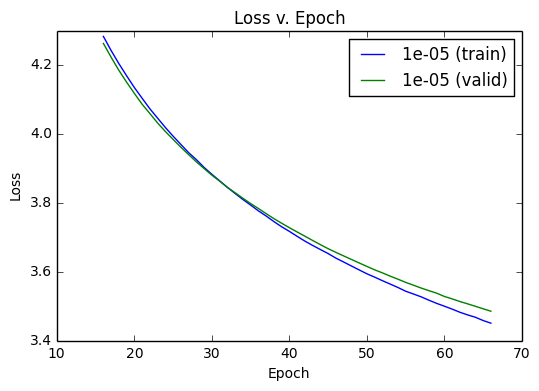

In [3]:
%matplotlib inline
for k in logs.keys():
    plt.plot(logs[k][0], logs[k][1], label=str(k) + ' (train)')
    plt.plot(logs[k][0], logs[k][2], label=str(k) + ' (valid)')
plt.title('Loss v. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Perplexity vs. Epoch

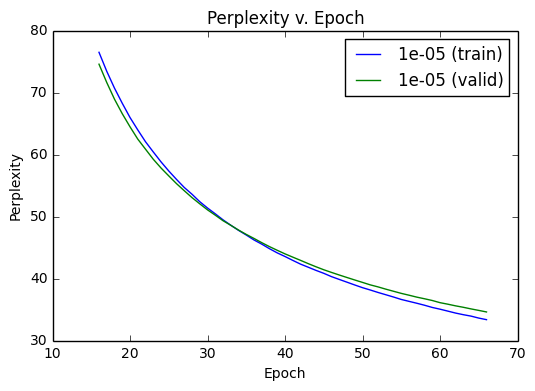

In [4]:
%matplotlib inline
for k in logs.keys():
    plt.plot(logs[k][0], logs[k][3], label=str(k) + ' (train)')
    plt.plot(logs[k][0], logs[k][4], label=str(k) + ' (valid)')
plt.title('Perplexity v. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Perplexity')
plt.legend()
plt.show()

### Generations

In [5]:
def print_sample(sample, best_bleu=None):
    enc_input = ' '.join([w for w in sample['encoder_input'].split(' ') if w != '<pad>'])
    gold = ' '.join([w for w in sample['gold'].split(' ') if w != '<mask>'])
    print('Input: '+ enc_input + '\n')
    print('Gend: ' + sample['generated'] + '\n')
    print('True: ' + gold + '\n')
    if best_bleu is not None:
        cbm = ' '.join([w for w in best_bleu['best_match'].split(' ') if w != '<mask>'])
        print('Closest BLEU Match: ' + cbm + '\n')
        print('Closest BLEU Score: ' + str(best_bleu['best_score']) + '\n')
    print('\n')
    

In [6]:
for i, sample in enumerate(report['train_samples']):
    print_sample(sample, report['best_bleu_matches_train'][i] if 'best_bleu_matches_train' in report else None)

Input:  easy cheesy taco bake <begin_ingredients> 1 lb . ground beef ( we buy direct from our favorite local farmer , black <UNK> farms ) <ing> 1 packet taco seasoning <ing> 2 tbsp salsa con queso ( or your favorite salsa / cheese dip ) <ing> about 2 cups mexican cheese blend ( or cheese blend of your choice ) <ing> 3 tortillas <end>

Gend:  <beg> preheat oven to 350 degrees . <step> in a large bowl , combine the flour , baking powder , salt , and pepper . <step>

True:  preheat oven to 350 <step> brown beef in skillet & add taco seasoning . cook as directed on seasoning packet <step> spray an 8×8 square baking pan or circle baking pan ( cake pan works well ) with non stick cooking spray <step> lay 1 tortilla on bottom of pan <step> put 1 / 3 taco beef on tortilla , top with 1 / 3 of your cheese ( this is where you can add tomatoes , <UNK> if you prefer ) <step> repeat for 3 layers & bake 15 minutes . <step> serve with sour cream & enjoy ! <end>

Closest BLEU Match:  pre - heat the ove

In [7]:
for i, sample in enumerate(report['valid_samples']):
    print_sample(sample, report['best_bleu_matches_valid'][i] if 'best_bleu_matches_valid' in report else None)

Input:  5 - minute healthy strawberry frozen yogurt <begin_ingredients> 4 cups frozen strawberries <ing> 3 tablespoons agave nectar or honey <ing> 1 / 2 cup plain yogurt ( non - fat or full fat ) <ing> 1 tablespoon fresh lemon juice <end>

Gend:  <beg> preheat oven to 350 degrees . <step> in a large bowl , combine the flour , baking powder , salt , and pepper . <step>

True:  add the frozen strawberries , agave nectar ( or honey ) , yogurt and lemon juice to the bowl of a food processor . process until creamy , about 5 minutes . <step> serve the frozen yogurt immediately or transfer it to an airtight container and store it in the freezer for up to 1 month . <end>

Closest BLEU Match:  pre - heat the oven to 350 degrees . <step> lightly grease a donut pan . <step> in a large bowl , combine the whole wheat flour , all - purpose flour , baking powder , cinnamon , and salt . <step> in a small bowl , combine the mashed bananas , non - dairy milk , sugar , melted coconut oil , and vanilla . 

In [8]:
for i, sample in enumerate(report['test_samples']):
    print_sample(sample, report['best_bleu_matches_test'][i] if 'best_bleu_matches_test' in report else None)

Input:  smoked salmon , avocado , dill and parsley mayo sandwich <begin_ingredients> 4 slices of smoked salmon <ing> 4 tablespoons of roza 's gourmet sauces dill & parsley mayo <ing> 1 avocado <ing> squeeze of lemon <ing> 1 bunch of spinach leaves <ing> 8 slices of toasted gluten free bread <end>

Gend:  <beg> preheat oven to 350 degrees . <step> in a large bowl , combine the flour , baking powder , salt , and pepper . <step>

True:  mash the lemon juice and avocado with dill and parsley mayo . spoon over a slice of bread and top with the sliced smoked salmon , spinach and other slice of bread . <step> this is also good with sliced roast chicken or turkey . <end>

Closest BLEU Match:  pre - heat the oven to 350 degrees . <step> lightly grease a donut pan . <step> in a large bowl , combine the whole wheat flour , all - purpose flour , baking powder , cinnamon , and salt . <step> in a small bowl , combine the mashed bananas , non - dairy milk , sugar , melted coconut oil , and vanilla . 

### BLEU Analysis

In [9]:
def print_bleu(blue_struct):
    print 'Overall Score: ', blue_struct['score'], '\n'
    print '1-gram Score: ', blue_struct['components']['1']
    print '2-gram Score: ', blue_struct['components']['2']
    print '3-gram Score: ', blue_struct['components']['3']
    print '4-gram Score: ', blue_struct['components']['4']

In [10]:
# Training Set BLEU Scores
print_bleu(report['train_bleu'])

Overall Score:  0 

1-gram Score:  54.8
2-gram Score:  20
3-gram Score:  7.3
4-gram Score:  3.3


In [11]:
# Validation Set BLEU Scores
print_bleu(report['valid_bleu'])

Overall Score:  0 

1-gram Score:  52.9
2-gram Score:  16
3-gram Score:  2.1
4-gram Score:  0


In [12]:
# Test Set BLEU Scores
print_bleu(report['test_bleu'])

Overall Score:  0 

1-gram Score:  50
2-gram Score:  21
3-gram Score:  10.4
4-gram Score:  7.6


In [13]:
# All Data BLEU Scores
print_bleu(report['combined_bleu'])

Overall Score:  0 

1-gram Score:  52.6
2-gram Score:  19
3-gram Score:  6.6
4-gram Score:  3.6


### N-pairs BLEU Analysis

This analysis randomly samples 1000 pairs of generations/ground truths and treats them as translations, giving their BLEU score. We can expect very low scores in the ground truth and high scores can expose hyper-common generations

In [14]:
# Training Set BLEU n-pairs Scores
print_bleu(report['n_pairs_bleu_train'])

Overall Score:  100 

1-gram Score:  100
2-gram Score:  100
3-gram Score:  100
4-gram Score:  100


In [15]:
# Validation Set n-pairs BLEU Scores
print_bleu(report['n_pairs_bleu_valid'])

Overall Score:  100 

1-gram Score:  100
2-gram Score:  100
3-gram Score:  100
4-gram Score:  100


In [16]:
# Test Set n-pairs BLEU Scores
print_bleu(report['n_pairs_bleu_test'])

Overall Score:  100 

1-gram Score:  100
2-gram Score:  100
3-gram Score:  100
4-gram Score:  100


In [17]:
# Combined n-pairs BLEU Scores
print_bleu(report['n_pairs_bleu_all'])

Overall Score:  100 

1-gram Score:  100
2-gram Score:  100
3-gram Score:  100
4-gram Score:  100


In [18]:
# Ground Truth n-pairs BLEU Scores
print_bleu(report['n_pairs_bleu_gold'])

Overall Score:  51.48 

1-gram Score:  58.3
2-gram Score:  50.5
3-gram Score:  49
4-gram Score:  48.7


### Alignment Analysis

This analysis computs the average Smith-Waterman alignment score for generations, with the same intuition as N-pairs BLEU, in that we expect low scores in the ground truth and hyper-common generations to raise the scores

In [19]:
print 'Average (Train) Generated Score: ', report['average_alignment_train']
print 'Average (Valid) Generated Score: ', report['average_alignment_valid']
print 'Average (Test) Generated Score: ', report['average_alignment_test']
print 'Average (All) Generated Score: ', report['average_alignment_all']
print 'Average Gold Score: ', report['average_alignment_gold']

Average (Train) Generated Score:  124
Average (Valid) Generated Score:  124
Average (Test) Generated Score:  124
Average (All) Generated Score:  124
Average Gold Score:  1050.40909091
